- 다중 분류기는 없음. 
- 있다고 하더라도 곡선이 너무 복잡하고 정교하기 힘듦.
- 3개의 클래스를 분류하려는 경우.
- 3개의 로지스틱 회귀 모델을 사용하여 각 모델에서 확률값을 추정

- 일 대 다 분류
    - A, B, C 클래스가 있을 때, 
    - A or (B or C)로 분류
    - B or (A or C)로 분류
    - C or (A or B)로 분류
    - 원핫인코딩 수행하여 가장 확률이 높은 레이블에 결과로 나온 클래스에 1줌
    
- 한 클래스에 대해 모델 1에서 0.8, 모델 2에서 0.2, 모델 3에서 0.4 로 예측했다면,
- 모든 예측 확률 합 1.4에 가장 큰 예측 확률 0.8을 나눠서 퍼센티지를 최종 예측 확률로 본다.

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC

### IRIS 분류

In [2]:
iris = datasets.load_iris()
list(iris.keys())

#print(iris.data)
print(iris.target)

x = iris.data[:, [0, 1]]
print(x)
y = iris.target

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 

In [3]:
# 학습시키기
log_reg = LogisticRegression(max_iter=3000)
log_reg.fit(x, y)

LogisticRegression(max_iter=3000)

In [4]:
np.mean(log_reg.predict(x) == y)

0.82

In [5]:
# 예측한 값과 실제값 y를 비교해서 평균을 내면 score값이 됨
log_reg.score(x, y)

0.82

In [10]:
from sklearn.metrics import f1_score
f1_score(log_reg.predict(x), y, average='macro')

0.81998199819982

In [11]:
# 원핫인코딩
y = np.array([0, 0, 1, 1, 2, 2, 1, 0, 2, 3, 3])
np.eye(4)[y]

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

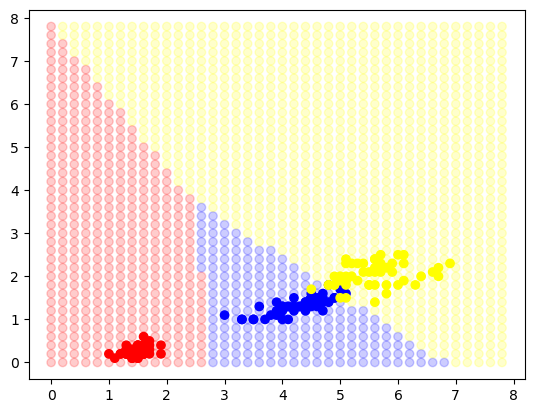

In [15]:
xx, yy = np.mgrid[0:8:0.2, 0:8:0.2]
grid = np.c_[xx.flatten(), yy.flatten()]
p = log_reg.predict(grid)

d = ['red', 'blue', 'yellow']
colors = [d[i]  for i  in p   ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)

colors = [d[i]  for i  in y   ]
plt.scatter(x[:,0], x[:,1], color=colors)

In [13]:
iris = datasets.load_iris()

x = [[d[0], d[1], 1] for d in iris.data[:, [2,3]]]
# 아이리스 데이터의 독립변수 2개씩을 가져와서 역행렬을 계산할 형태로 재구성
# 1을 주는 이유는 상수항(절편, b)를 구하기 위함인데,
# 1이 없더라도 상수가 0임을 가정해서 식을 세울 수 있음
# y = wx 로만 이루어진 식으로도 선형문제는 풀 수 있다.
y = iris.target
Y = np.eye(3)[y]

W = np.matmul(np.linalg.pinv(x), Y)   # 학습
p = np.matmul(x, W)                   # 다중클래스 predict
y_ = np.argmax(p, axis=1)             # 최댓값 출력
np.mean(y == y_)                      # 인식률 계산

0.7733333333333333

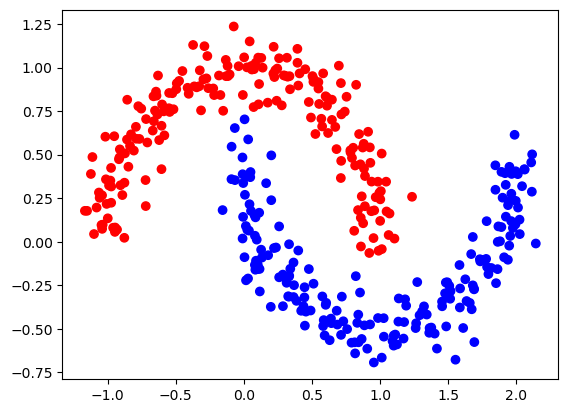

In [14]:
x_data, y_data= make_moons(n_samples=400, noise=0.1, random_state=0)

colors = ["red"  if   i  == 0  else   "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors,alpha=1.0)

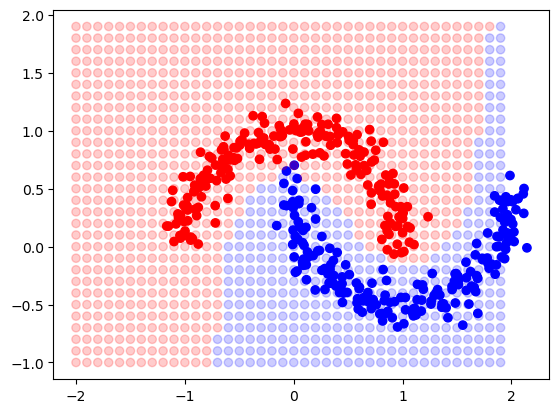

In [21]:
#model = SVC(kernel='linear').fit(x_data, y_data) 
#model = SVC(kernel='poly', degree=3).fit(x_data, y_data) 
model = SVC(kernel='rbf').fit(x_data, y_data) 
colors = ["red"  if   i  == 0  else   "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors,alpha=1.0)

xx, yy = np.mgrid[-2.0:2:0.1, -1.0:2.0:0.1]
grid = np.c_[xx.ravel(), yy.ravel()]

p = model.predict(grid)

colors = ["red"  if i == 0  else  "blue"  for i  in p   ]
plt.scatter(np.array([xx]).flatten(), np.array([yy]).flatten(), color = colors, alpha=0.2)